In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon

True
True
True


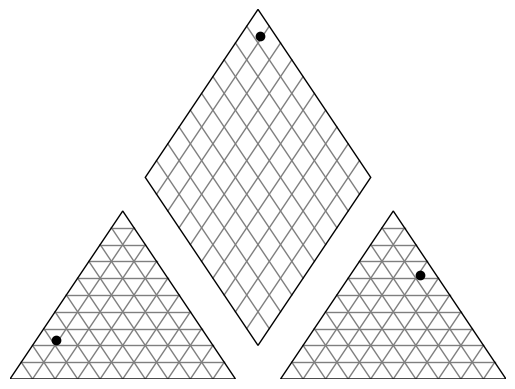

In [35]:
def ternary_with_combined(side_len: float, sep_len: float):
    fig, ax = plt.subplots()
    # since triangles are equilateral: theta = pi / 3, sin(theta) = sqrt(3) / 2
    sq3 = np.sqrt(3)

    # ==== lower left triangle ====
    # lower left vertex
    ll_left = np.array([0, 0])
    # lower right vertex
    ll_right = np.array([side_len, 0])
    # top vertex
    ll_top = np.array([side_len / 2.0, (side_len * sq3) / 2.0])

    # ==== lower right triangle ====
    # lower left vertex
    lr_left = np.array([side_len + sep_len, 0])
    # lower right vertex
    lr_right = np.array([(2.0 * side_len) + sep_len, 0])
    # top vertex
    lr_top = np.array([(3.0 * side_len / 2.0) + sep_len, sq3 * side_len / 2.0])

    # ==== quad ====
    # bottom vertex
    q_bot = np.array([side_len + (sep_len / 2.0), sq3 * sep_len / 2.0])
    # top vertex
    q_top = np.array([side_len + (sep_len / 2.0), sq3 * (side_len + (sep_len / 2.0))])
    # left vertex
    q_left = np.array([(side_len + sep_len) / 2.0, sq3 * (side_len + sep_len) / 2.0])
    # right vertex
    q_right = np.array([((3.0 * side_len) + sep_len) / 2.0, sq3 * (side_len + sep_len) / 2.0])

    def mix(p: float, a: np.ndarray, b: np.ndarray):
        return ((1 - p) * a) + (p * b)
    
    def make_diag(p: float, a: np.ndarray, b: np.ndarray, c: np.ndarray, d: np.ndarray, **kwargs):
        diag_first = mix(p, a, b)
        diag_second = mix(p, c, d)
        ax.plot([diag_first[0], diag_second[0]], [diag_first[1], diag_second[1]], **kwargs)
    
    def make_tri_diag(p: float, a: np.ndarray, b: np.ndarray, c: np.ndarray, **kwargs):
        make_diag(p, a, b, c, b, **kwargs)

    for i in np.linspace(1, 9, 9):
        perc = i / 10.0 # prevent weird floating-point imprecision

        # === lower left triangle ===
        # horizontal line
        make_tri_diag(perc, ll_left, ll_top, ll_right, color='tab:gray', lw=1, zorder=1)
        # [lower-left]-to-[upper-right] diagonal
        make_tri_diag(perc, ll_top, ll_right, ll_left, color='tab:gray', lw=1, zorder=1)
        # [upper-left]-to-[lower-right] diagonal
        make_tri_diag(perc, ll_right, ll_left, ll_top, color='tab:gray', lw=1, zorder=1)

        # === lower right triangle ===
        # horizontal line
        make_tri_diag(perc, lr_left, lr_top, lr_right, color='tab:gray', lw=1, zorder=1)
        # [lower-left]-to-[upper-right] diagonal
        make_tri_diag(perc, lr_top, lr_right, lr_left, color='tab:gray', lw=1, zorder=1)
        # [upper-left]-to-[lower-right] diagonal
        make_tri_diag(perc, lr_right, lr_left, lr_top, color='tab:gray', lw=1, zorder=1)

        # === quad ===
        # [lower-left]-to-[upper-right] diagonal
        make_diag(perc, q_bot, q_left, q_right, q_top, color='tab:gray', lw=1, zorder=1)
        # [upper-left]-to-[lower-right] diagonal
        make_diag(perc, q_bot, q_right, q_left, q_top, color='tab:gray', lw=1, zorder=1)

    # lower left triangle
    ax.add_patch(Polygon([ll_left, ll_right, ll_top], closed=True, fill=False))
    
    # lower right triangle
    ax.add_patch(Polygon([lr_left, lr_right, lr_top], closed=True, fill=False))
    
    # combined quad
    ax.add_patch(Polygon([q_bot, q_right, q_top, q_left], closed=True, fill=False))

    # test lower left triangle with data
    a_v = 0.68
    b_v = 0.09
    c_v = 1.0 - (a_v + b_v)

    a_p = ll_left + ((1.0 - a_v) * np.array([3.0 * side_len / 4.0, side_len * sq3 / 4.0]))
    b_p = ll_right + ((1.0 - b_v) * np.array([-3.0 * side_len / 4.0, side_len * sq3 / 4.0]))
    c_p = ll_top + ((1.0 - c_v) * np.array([0, side_len * sq3 / -2.0]))

    ll_pt_x = 0.5 * (a_p[0] + b_p[0] + ((a_p[1] - b_p[1]) / sq3))
    ll_pt_y_ap = (sq3 * (a_p[0] - ll_pt_x)) + a_p[1]
    ll_pt_y_bp = (sq3 * (ll_pt_x - b_p[0])) + b_p[1]
    ll_pt_y = np.mean([ll_pt_y_ap, ll_pt_y_bp, c_p[1]])
    # sanity check
    print(np.allclose([ll_pt_y_ap, ll_pt_y_bp, c_p[1]], [ll_pt_y] * 3))

    ax.scatter([ll_pt_x], [ll_pt_y], c='k')

    # test lower right triangle with data
    d_v = 0.07
    e_v = 0.31
    f_v = 1.0 - (d_v + e_v)

    d_p = lr_left + ((1.0 - d_v) * np.array([3.0 * side_len / 4.0, side_len * sq3 / 4.0]))
    e_p = lr_right + ((1.0 - e_v) * np.array([-3.0 * side_len / 4.0, side_len * sq3 / 4.0]))
    f_p = lr_top + ((1.0 - f_v) * np.array([0, side_len * sq3 / -2.0]))

    lr_pt_x = 0.5 * (d_p[0] + e_p[0] + ((d_p[1] - e_p[1]) / sq3))
    lr_pt_y_dp = (sq3 * (d_p[0] - lr_pt_x)) + d_p[1]
    lr_pt_y_ep = (sq3 * (lr_pt_x - e_p[0])) + e_p[1]
    lr_pt_y = np.mean([lr_pt_y_dp, lr_pt_y_ep, f_p[1]])
    # sanity check
    print(np.allclose([lr_pt_y_dp, lr_pt_y_ep, f_p[1]], [lr_pt_y] * 3))

    ax.scatter([lr_pt_x], [lr_pt_y], c='k')

    # test quad with combined data
    q_pt_x = 0.5 * (ll_pt_x + lr_pt_x + ((lr_pt_y - ll_pt_y) / sq3))
    q_pt_y_ll = (sq3 * (q_pt_x - ll_pt_x)) + ll_pt_y
    q_pt_y_lr = (sq3 * (lr_pt_x - q_pt_x)) + lr_pt_y
    q_pt_y = np.mean([q_pt_y_ll, q_pt_y_lr])
    # sanity check
    print(np.allclose([q_pt_y_ll, q_pt_y_lr], [q_pt_y] * 2))

    ax.scatter([q_pt_x], [q_pt_y], c='k')
    
    ax.set_xlim(xmin=0, xmax=(2.0 * side_len) + sep_len)
    ax.set_ylim(ymin=0, ymax=sq3 * (side_len + (sep_len / 2.0)))
    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_visible(False)

ternary_with_combined(5, 1)

True
True
True


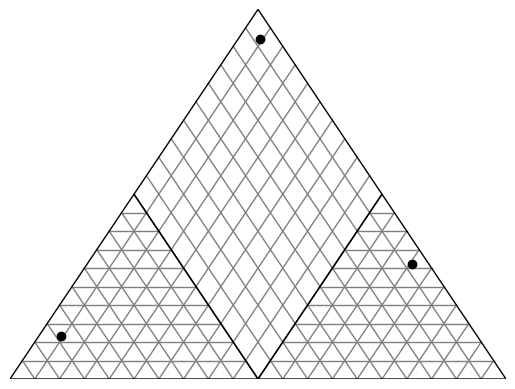

In [36]:
ternary_with_combined(5, 0)